In [88]:
print "Mankatha da"

Mankatha da


In [111]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [99]:
import math
def walds_test(L1,L2,mu1,mu2):
    # print mu1,mu2
    var1 = 0
    for v in L1:
        var1+=(v-mu1)*(v-mu1)
    var1=var1/float(len(L1)-1)

    var2 = 0
    for v1 in L2:
        var2 += (v1 - mu2) * (v1 - mu2)
    var2 = var2 / float(len(L2)-1)

    var = var1 + var2

    var = math.sqrt(var)

    ans = (mu1-mu2) / float(var)
#     print "num",(mu1-mu2)
#     print "denom",var
    print "W value",ans

In [90]:
def isWeekend(timestamp):
    # Start time is May 1 2011 (19:00 EDT). It is a Sunday
#     print d.year, d.month, d.day, d.hour, d.second
    start_date = datetime.datetime(2011, 5, 1, 19, 0)
    datee = start_date + timedelta(microseconds = timestamp)
    day = datee.weekday()
    if day == 5 or day ==6:
        return 1
    return 0

isWeekend(515042954)

1

In [91]:
def myFunction(df):
    job_ids = df['job_id'].unique()
    output_df_weekday = pd.DataFrame(columns=["job_id","task_index","mean_cpu_usage","mean_io"])
    output_df_weekend = pd.DataFrame(columns=["job_id","task_index","mean_cpu_usage","mean_io"])
#     print len(job_ids)
    for job_id in job_ids:
        small_df = df[df['job_id'] == job_id]
        if not small_df.empty:
            task_indexes = small_df['task_index'].unique()
            for task_index in task_indexes:
                smallest_df = small_df[small_df['task_index'] == task_index]
                if not (smallest_df.empty):
                    row = smallest_df.iloc[0]
                    job_idd = row.job_id
                    task_indexx = row.task_index
                    mean_cpu_usagee = row.mean_cpu_usage
                    mean_ioo = row.mean_io
                    timee = row.end_time 
                    output_data = pd.DataFrame(columns=["job_id","task_index","mean_cpu_usage","mean_io"],data=[[job_idd,task_indexx,mean_cpu_usagee,mean_ioo]])
                    if not isWeekend(timee):
                        output_df_weekday = output_df_weekday.append(output_data)
#                         print "hi"
                    else:
                        output_df_weekend = output_df_weekend.append(output_data)
                    break
    return output_df_weekday,output_df_weekend

In [92]:
data_dir = "./data/task_usage/"

task_usage_header = ['start_time','end_time','job_id','task_index','machine_id', 'mean_cpu_usage',
                     'canon_memory_usage', 'assign_memory_usage', 'unmapped_cache', 'total_cache', 
                     'max_mem', 'mean_io', 'mean_space', 'max_cpu', 'max_io', 'cpi', 'mai', 'sample',
                     'agg_type', 'sample_cpu_usage']

In [ ]:
output_dataframe_weekday = pd.DataFrame()
output_dataframe_weekend = pd.DataFrame()
i_list=[0,1,2,3,10,25,345,200,260,300,367,234,127,78,467,499]
for i in range(250):
    file_str = str(i).zfill(5) 
    print file_str
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv.gz",header=None)
    df.columns = task_usage_header
    weekday_df,weekend_df = myFunction(df)
    output_dataframe_weekday = output_dataframe_weekday.append(weekday_df)
    output_dataframe_weekend = output_dataframe_weekend.append(weekend_df)
    output_data_dir1 = "./data/task_usage_input_weekdays/part-"+file_str+"-of-00500.csv"
    output_data_dir2 = "./data/task_usage_input_weekend/part-"+file_str+"-of-00500.csv"
    weekday_df.to_csv(output_data_dir1, sep='\t')
    weekend_df.to_csv(output_data_dir2, sep='\t')
#     break

In [ ]:
print output_dataframe_weekend['mean_io'].mean()
print output_dataframe_weekday['mean_io'].mean()

In [ ]:
output_dataframe_weekend

In [ ]:
output_dataframe_weekday[output_dataframe_weekday['mean_cpu_usage'] != 0]

In [110]:
# Walds test for mean_cpu_usage and mean io
walds_test(output_dataframe_weekday['mean_io'].tolist(),output_dataframe_weekend['mean_io'].tolist(),output_dataframe_weekday['mean_io'].mean(),output_dataframe_weekend['mean_io'].mean())
walds_test(output_dataframe_weekday['mean_cpu_usage'].tolist(),output_dataframe_weekend['mean_cpu_usage'].tolist(),output_dataframe_weekday['mean_cpu_usage'].mean(),output_dataframe_weekend['mean_cpu_usage'].mean())

num 8.30472174535e-05
denom 0.00542581035071
0.0153059565457
num 0.000476739342162
denom 0.0445886167628
0.0106919518203


In [ ]:
output_dataframe_weekday[output_dataframe_weekday['mean_cpu_usage'] != 0]

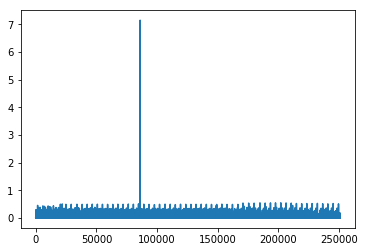

In [124]:
output_dataframe_weekend = output_dataframe_weekend[output_dataframe_weekend['mean_cpu_usage'] != 0]
output_dataframe_weekend.dropna(axis=0,inplace=True)
mean_id_list = output_dataframe_weekend['mean_cpu_usage'].tolist()
plt.plot([x for x in range(len(mean_id_list))],mean_id_list)
plt.show()

In [ ]:
output_dataframe_weekday = output_dataframe_weekday[output_dataframe_weekday['mean_cpu_usage'] != 0]
# output_dataframe_weekday.dropna(axis=0,inplace=True)
output_dataframe_weekday

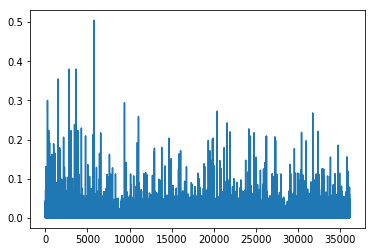

In [126]:
grouped_weekend_data = output_dataframe_weekend.groupby(['job_id']).mean()
grouped_weekday_data = output_dataframe_weekday.groupby(['job_id']).mean()
mean_id_list = dummy['mean_cpu_usage'].tolist()
plt.plot([x for x in range(len(mean_id_list))],mean_id_list)
plt.show()

In [127]:
# Walds test for mean_cpu_usage and mean io
walds_test(grouped_weekend_data['mean_io'].tolist(),grouped_weekday_data['mean_io'].tolist(),grouped_weekend_data['mean_io'].mean(),grouped_weekday_data['mean_io'].mean())
walds_test(grouped_weekday_data['mean_cpu_usage'].tolist(),grouped_weekend_data['mean_cpu_usage'].tolist(),grouped_weekday_data['mean_cpu_usage'].mean(),grouped_weekend_data['mean_cpu_usage'].mean())

num -0.00054690541584
denom 0.0104896191563
-0.0521377761855
num -0.000535433842355
denom 0.0239136169991
-0.0223903327704
